<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Foundation Project - Customer Classification for Retail Bank</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021/blob/ML-Foundation-Customer-Classification-Project/bank-logo.png?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- AE Corp is retail banking institution.

    - They are going to float a stock trading facility for their existing customers.

    - The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.

    - They will have to incentivize their customers to adopt their offerings.

    - One way to incentivize is to offer discounts on the commission for trading transactions.


**<h3>Current Scenario:</h3>**

- The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2. 

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
    - One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.

    - The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

    - They will have to incentivize their customers to adopt their offerings.

    - The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.


<a name = Section21></a>
### **Your Role**

- You are given datasets of past customers and their status (Revenue Grid 1 or 2).

- Your task is to build a classification model using the datasets.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. 
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Predict whether a customer belongs to a high net worth or low net worth group.**

- Machine Learning Task: **Classification.**

- Target Variable: **Status (high net worth (1) / low net worth (2))**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the F1-Score score.

<center><img src="https://github.com/girishksahu/INSAID2021/blob/ML-Foundation-Customer-Classification-Project/stocks-trade.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [242]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.7.11


<a name = Section32></a>
### **3.2 Importing Libraries**

In [243]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.5
numpy version 1.19.5
seaborn version 0.11.1
sklearn version 0.22.2.post1


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of the information about **Customers** Along with column **Revenue_Grid** which classifies the customers into high net worth customers (1) and low net worth customers (2).


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8124 | 32 | 1619 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **REF_NO**   | Reference Number of the customer                          |
|02| **children**      | Number of children each customer has                 |
|03| **Age_band**        | Age Group to which the customer belongs            |
|04| **status**          | Marital Status of the customer                     |
|05| **occupation**      | Job or profession of the customer                  |
|06| **occupation_partner**           | Job or profession of the customer's partner                                  |
|07| **home_status**     | Home Status of the customers |
|08| **family_income**     | Income Range of the customer's family|
|09| **self_employed**        | Whether self-employed or not                                         |
|10| **self_employed_partner**          | Whether the partner self-employed or not                                   |
|11| **year_last_moved**         | Moving Year from the last location of the customer  |
|12| **TVarea**     | Television Region of the customer                                   |
|13| **post_code**     | 	Postal Code of the customer                                  |
|14| **post_area**     | Postal Area of the customer                                  |
|15| **Average_Credit_Card_Transaction**     | Average Credit Card Transaction per year by the customer           |
|16| **Balance_Transfer**     | Transfer of the Balance in an account to another account by the customer           |
|17| **Term_Deposit**     | Cash Investment Help at Financial Institute provided to the customer                              |
|18| **Life_Insurance**     | Basic Life Insurance Coverage of the customer                                  |
|19| **Medical_Insurance**     | Medical Insurance Coverage of the customer                                  |
|20| **Average_A/C_Balance**     | Average Balance in the account of the customer                                  |
|21| **Personal_Loan**     | Amount of Personal Loan taken by the customer                                  |
|22| **Investment_in_Mutual_Fund**     | Amount Invested in Mutual Funds by the customer                                  |
|23| **Investment_Tax_Saving_Bond**     | Amount Invested in Tax Saving Bond by the customer                                  |
|24| **Home_Loan**     | Amount of Home Loan taken by the customer                                   |
|25| **Online_Purchase_Amount**     | Amount spent by the customer on online purchases                                   |
|26| **gender**     | Gender of the customer                                   |
|27| **region**     | Region of the customer                                   |
|28| **Investment_in_Commodity**     | Amount Invested in Commodity by the customer                                   |
|29| **Investment_in_Equity**     | Amount Invested in Equity by the customer                                   |
|30| **Investment_in_Derivative**     | Amount Invested in Derivatives by the customer                                   |
|31| **Portfolio_Balance**     | 	Balanced Investment Strategy of the customer                                   |
|32| **Revenue_Grid**     | Grid report of the customers                                   |

- Load AE Corp Retail Bank Customer Data to be used for Training and Validation

In [244]:
# REF_NO is unique ID for customer and can be used as label for index
cust_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Foundation-Customer-Classification-Project/existing_base_train.csv", index_col='REF_NO')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', cust_master_data.shape)

# Output first 5 data rows
cust_master_data.head()


Shape of the Training and Validation dataset: (8124, 31)


,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [245]:
#There is error in spelling of column Investment_in_Commudity, so renaming it for better clarity
cust_master_data=cust_master_data.rename(columns={'Investment_in_Commudity':'Investment_in_Commodity'})

- Load AE Corp Retail Bank Customer Test Data to be used for Prediction

In [246]:
# REF_NO is unique ID for customer and can be used as label for index
cust_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Foundation-Customer-Classification-Project/existing_base_test.csv", index_col='REF_NO')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', cust_test_data.shape)

# Output first 5 data rows
cust_test_data.head()

Shape of the Test dataset to be used for Prediction: (2031, 30)


,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [247]:
#There is error in spelling of column Investment_in_Commudity, so renaming it for better clarity
cust_test_data=cust_test_data.rename(columns={'Investment_in_Commudity':'Investment_in_Commodity'})

In [248]:
# Check for any missing values
any(cust_master_data.isna().sum())

False

In [249]:
#check if any duplicate row
any(cust_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [250]:
#year_last_moved is not relevant for statistical details but need to check count just to confirm
#Revenue_Grid is Target variable and has two category as 1(High Net Worth) and 2 (Low Net Worth)
cust_master_data.describe(include=[np.int64]).filter(items=['count'], axis=0)

,year_last_moved,Revenue_Grid
count,8124.0,8124.0


In [251]:
#Basic statistical details for numeric variables
cust_master_data.describe(include=[np.float64])

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368
std,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500
50%,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000
75%,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000
max,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000


**Observations:**
- Total count for all numeric variables is same as 8124 which confirms that there is no missing values.
- Most of them have outliers and mean value is higher than median
- Variables like **Personal_Loan**,**Average_Credit_Card_Transaction**, **Term_Deposit** and **Online_Purchase_Amount** etc. appears to be highly skewed.
- Variables like **Investment_in_Commodity**, **Investment_in_Equity**, **Investment_in_Derivative** and **Portfolio_Balance** etc. appears to be having normal distribution.

In [252]:
#Basic statistical details for categorical variables
cust_master_data.describe(include=[np.object])

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,5,13,5,9,9,5,13,2,2,14,8050,1937,3,13
top,Zero,45-50,Partner,Professional,Unknown,Own Home,">=35,000",No,No,Central,RH6 9XJ,PR5,Female,South East
freq,4991,1098,6124,1949,1942,7506,2014,7543,7207,1294,2,28,6106,1680


**Observations:**
- Total count for all categorical variables is same as 8124 which confirms that there is no missing values. 
- Majority of customers are having **0 children** and falls in **age_band of 45-50** with having **partner as status**
- Majority of customers are under **Professional occupation** and has **Own Home as home_status**
- Majority of customers has category of **family_income >=35,000** and **gender as female**
- Majority of customers are from **Central TVarea** with **PR5 post_area** in **South East region**

In [253]:
# Check any duplicate rows
cust_master_data.duplicated().sum()

0

In [254]:
# Columns list can be handy and useful for further steps
cust_master_data.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commodity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [255]:
# Check column data types and any null values
cust_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 5466 to 8267
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  TVarea                           8124 non-null   object 
 11  post_code                        8124 non-null   object 
 12  post_area        

**Observations:**

- Total Non-Null count for each column is same as 8124 which means there is no missing values.

- There are **14 Categorical features**, **15 Numerical features** with 3 columns as integer feature as they contain numerical values.

In [256]:
# Get list of categorical variables
s = (cust_master_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['children', 'age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender', 'region']


In [257]:
# Get list of numerical variables
s = (cust_master_data.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['year_last_moved', 'Revenue_Grid']


In [258]:
# Get list of numerical variables
s = (cust_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commodity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']


### **Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

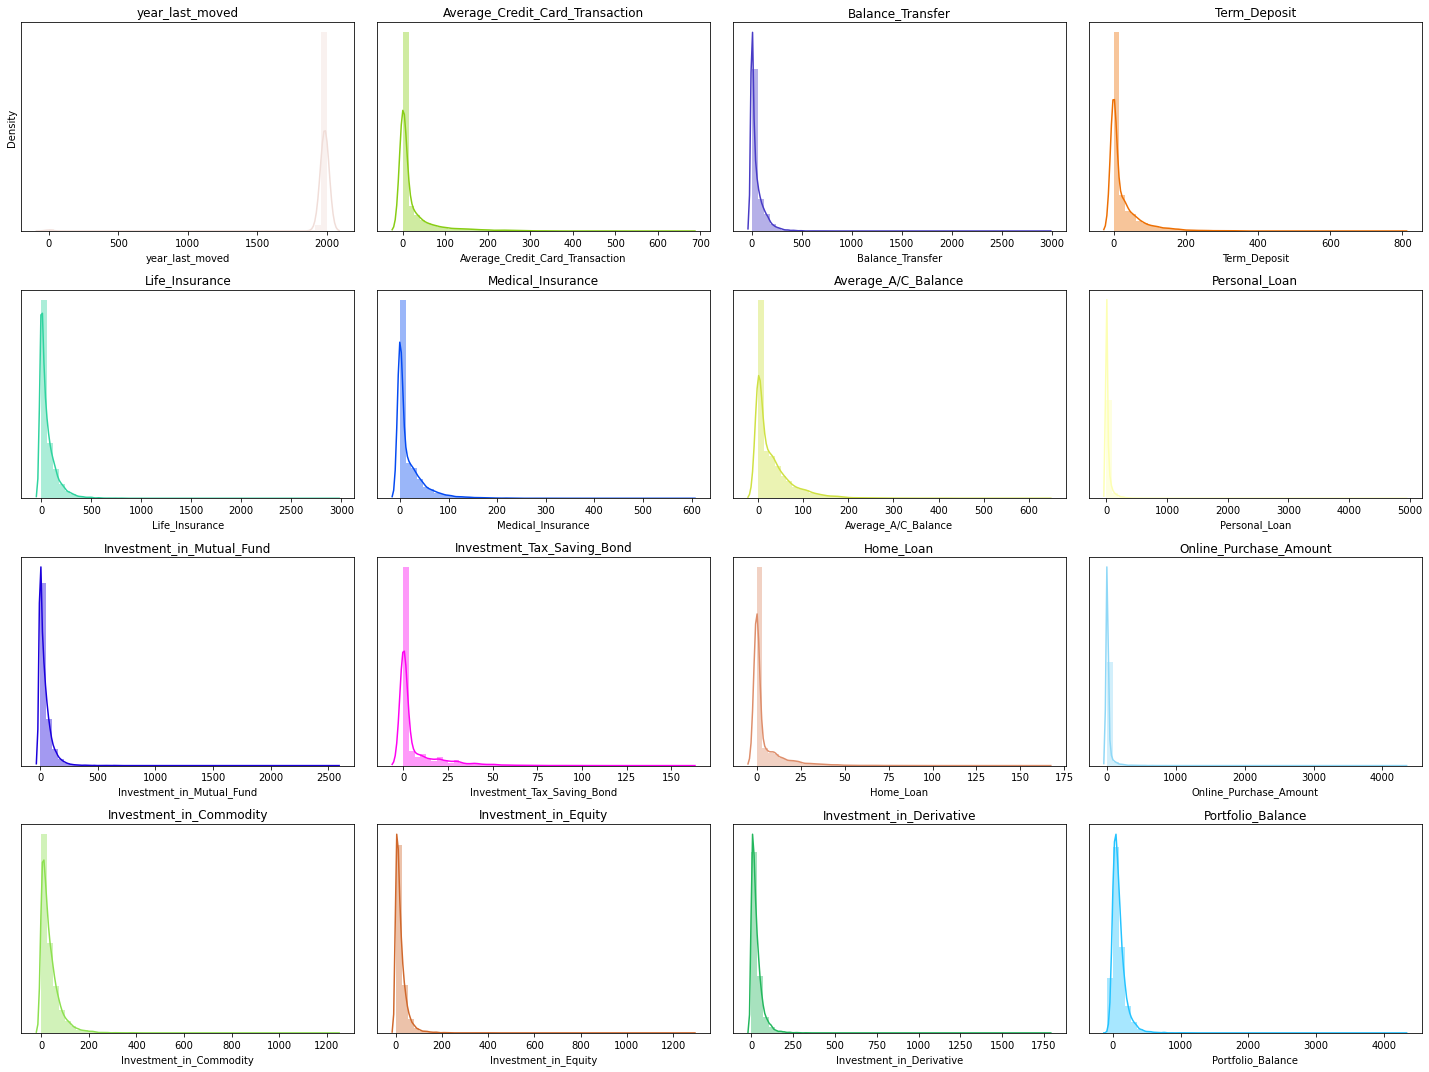

In [259]:
# For Random seed values
from random import randint
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 15))
colors = []
for i in range(16):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  columns=['year_last_moved','Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commodity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = cust_master_data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Postive Skewed Features: (Mean > Median)**
 - Average_Credit_Card_Transaction,
 - Balance_Transfer, 
 - Term_Deposit, 
 - Life_Insurance, 
 - Medical_Insurance, 
 - Average_A/C_Balance, 
 - Personal_Loan
 - Investment_in_Mutual_Fund
 - Investment_Tax_Saving_Bond
 - Home_Loan
 - Online_Purchase_Amount
 - Investment_in_Commodity
 - Investment_in_Equity
 - Investment_in_Derivative
 - Portfolio_Balance
- **Negative Skewed Features: (Mean < Median)**
 - year_last_moved
- **~ Normally Distributed Features: (Mean = Median = Mode)**
 - None

### **Categorical Data Distribution:**

- We shall plot all **categorical features to analyze the distribution** of the past data.


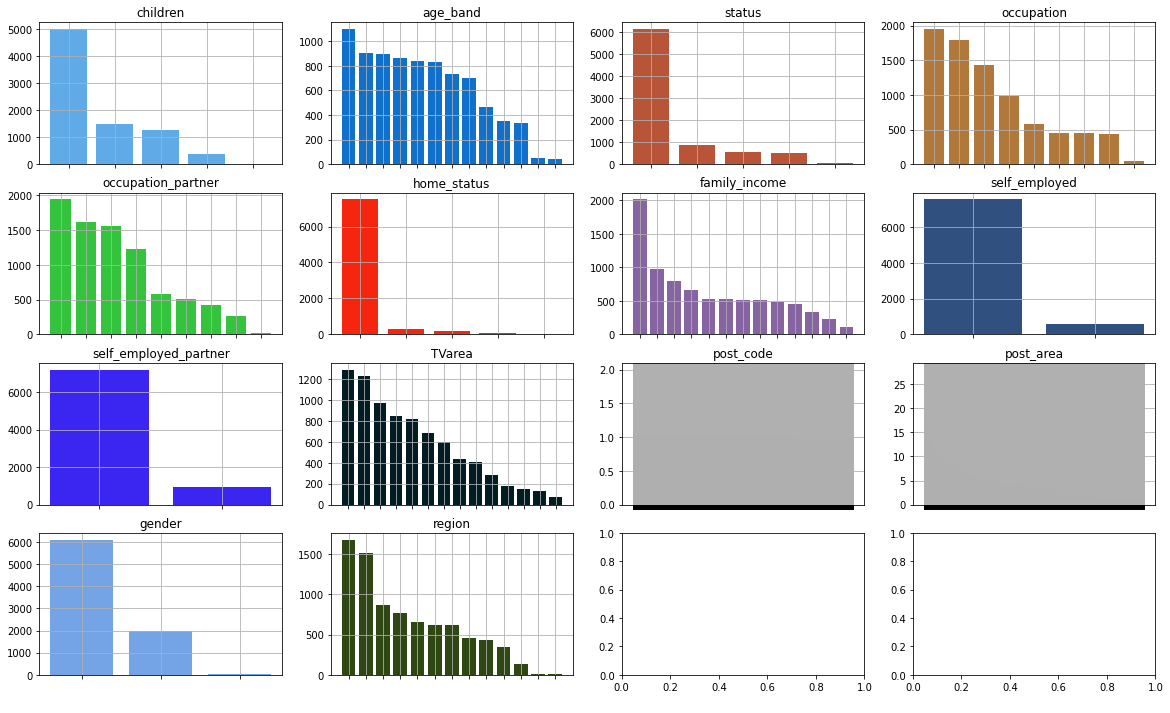

In [260]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 12))

colors = []
for i in range(14):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, object_cols, colors):
  ax.bar(x = cust_master_data[col].value_counts().index, height = cust_master_data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observation:**

- **Normal Distributed Features: (Mean = Median = Mode)**
 - age_band, 
 - post_code, 
 - post_area
- **Postively Skewed Features: (Mean > Median)**
 - children, 
 - status, 
 - occupation, 
 - occupation_partner,
 - home_status
 - family_income
 - self_employed
 - self_employed_partner
 - TVarea
 - gender
 - region
- **Negatively Skewed Features: (Mean < Median)**
 - NA

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [261]:
# profile = ProfileReport(df=cust_master_data)
# profile.to_file(output_file='Customer-classification Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- The report shows that there are a **total** of **32 features** out of which **17** are **numerical**, **13** are **categorical** and **2** are showing of type **boolean** as per report but they are categorical too.

- Only **860** customers are High Net Worth out of **8124**

- **Home Ownership**, is higher with **7506** customers having Own Home.

- **Self Employed** number of customers is very low.

- **High Family Income** number of customer is **2014** but **3154** number of customers are **low Family Income** customers.

- There are no missing values

- For detailed information, please check **Customer-classification Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

In [262]:
# year_last_moved feature is not required for EDA and Model Evaluation
# post_area and post_code feature can be removed
cust_master_data.drop(columns=['year_last_moved','post_area','post_code'], inplace=True)

# year_last_moved, post_area and post_code feature need to be removed in Test dataset
cust_test_data.drop(columns=['year_last_moved','post_area','post_code'], inplace=True)

In [263]:
cust_master_data.head(10)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,Meridian,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,Meridian,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,HTV,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,Scottish TV,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,Yorkshire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,Ulster,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,Central,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,Granada,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,Unknown,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2


In [264]:
cust_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 5466 to 8267
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   TVarea                           8124 non-null   object 
 10  Average_Credit_Card_Transaction  8124 non-null   float64
 11  Balance_Transfer                 8124 non-null   float64
 12  Term_Deposit     

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [265]:
# post_profile=ProfileReport(df=cust_master_data)
# post_profile.to_file(output_file='Customer-classification Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Customers having children?**

In [266]:
cust_master_data['children'].value_counts()

Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

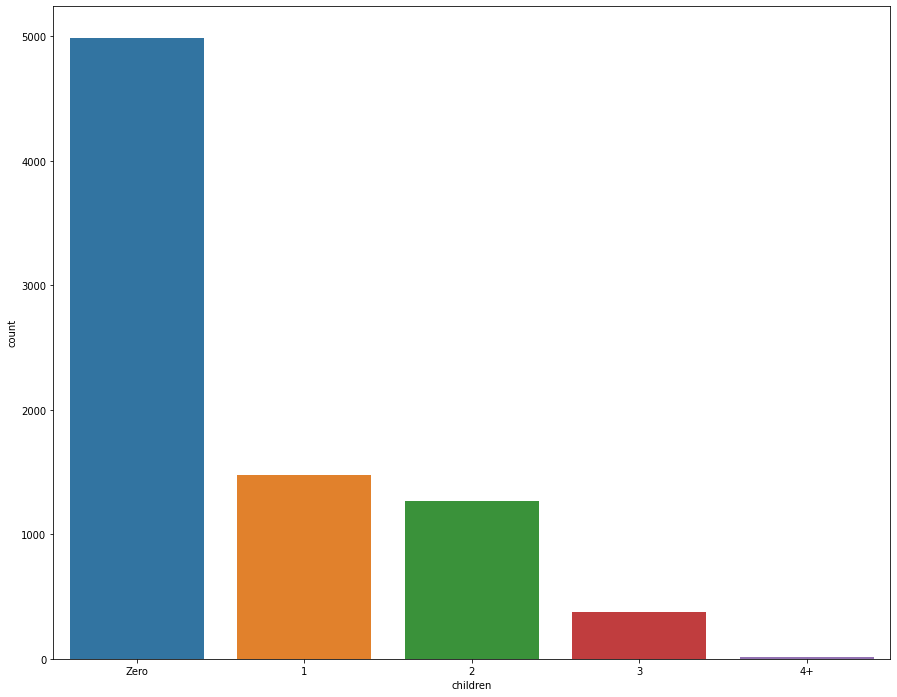

In [267]:
plt.figure(figsize=(15,12))
sns.countplot(x='children',data=cust_master_data,order=cust_master_data['children'].value_counts().index)

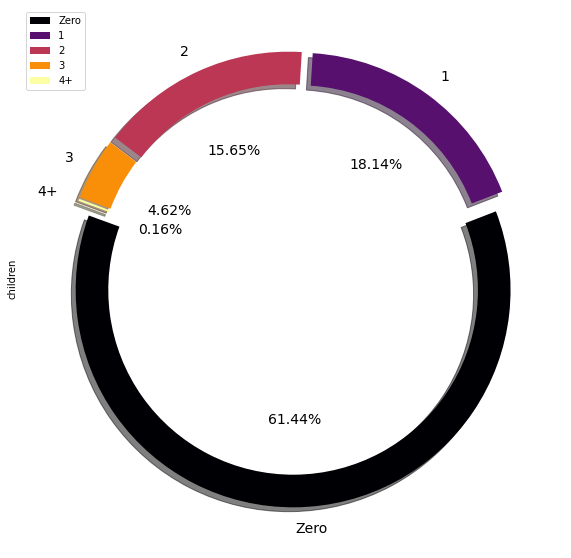

In [268]:
cust_master_data['children'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05], fontsize=14, autopct='%.2f%%', wedgeprops=dict(width=0.15), 

                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

**Q: What is the breakdown of Customers across age band?**

In [269]:
cust_master_data['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

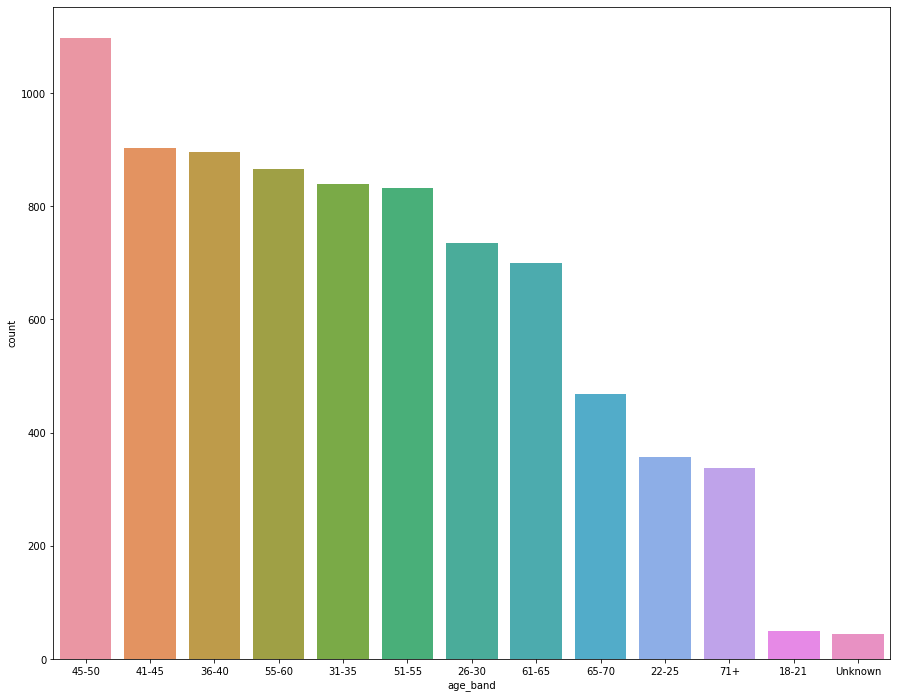

In [270]:
plt.figure(figsize=(15,12))
sns.countplot(x='age_band',data=cust_master_data,order=cust_master_data['age_band'].value_counts().index)

**Q: What is the breakdown of Customers across marriage status?**

In [271]:
cust_master_data['status'].value_counts()

Partner                 6124
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Unknown                   40
Name: status, dtype: int64

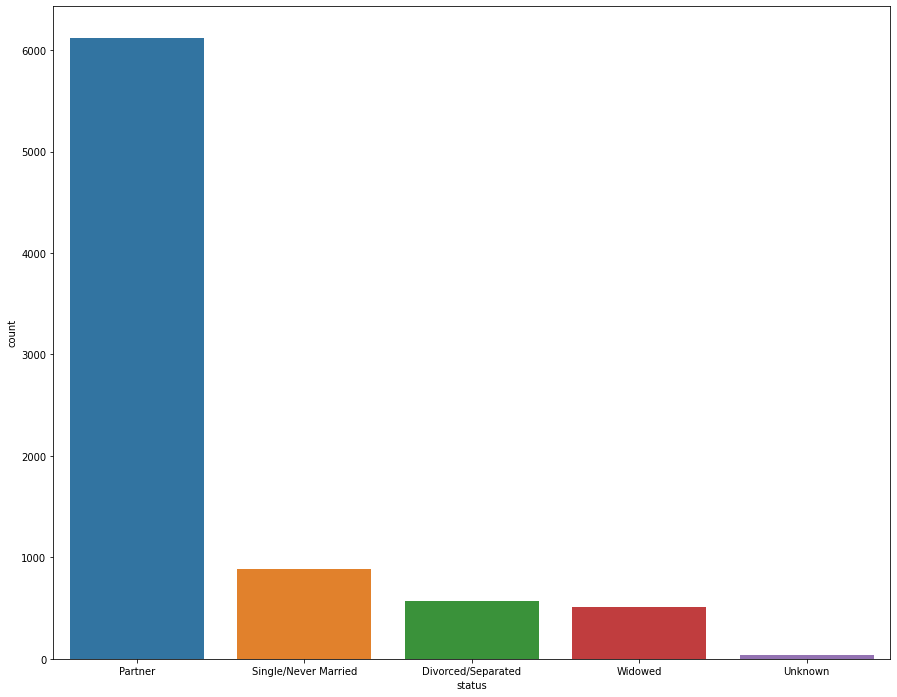

In [272]:
plt.figure(figsize=(15,12))
sns.countplot(x='status',data=cust_master_data,order=cust_master_data['status'].value_counts().index)

**Q: What is the breakdown of Customers across Occupation?**

In [273]:
cust_master_data['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

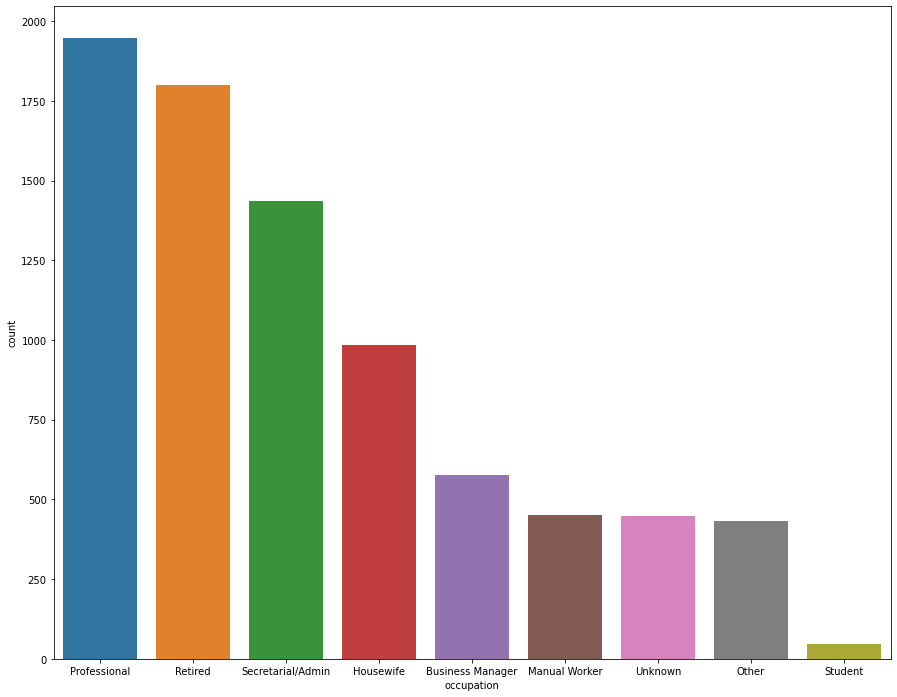

In [274]:
plt.figure(figsize=(15,12))
sns.countplot(x='occupation',data=cust_master_data,order=cust_master_data['occupation'].value_counts().index)

**Q: What is the breakdown of Customers across Occupuation Partner?**

In [275]:
cust_master_data['occupation_partner'].value_counts()

Unknown              1942
Professional         1620
Retired              1558
Manual Worker        1222
Business Manager      575
Secretarial/Admin     510
Housewife             422
Other                 261
Student                14
Name: occupation_partner, dtype: int64

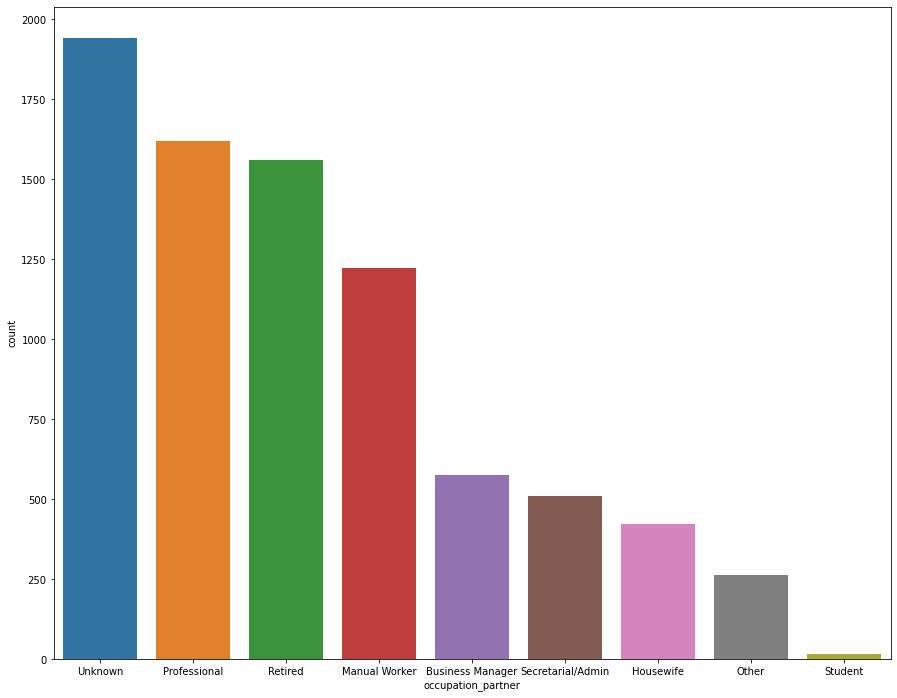

In [276]:
plt.figure(figsize=(15,12))
sns.countplot(x='occupation_partner',data=cust_master_data,order=cust_master_data['occupation_partner'].value_counts().index)

**Q: What is the breakdown of Customers across Home Status?**

In [277]:
cust_master_data['home_status'].value_counts()

Own Home                7506
Rent from Council/HA     279
Rent Privately           205
Live in Parental Hom      90
Unclassified              44
Name: home_status, dtype: int64

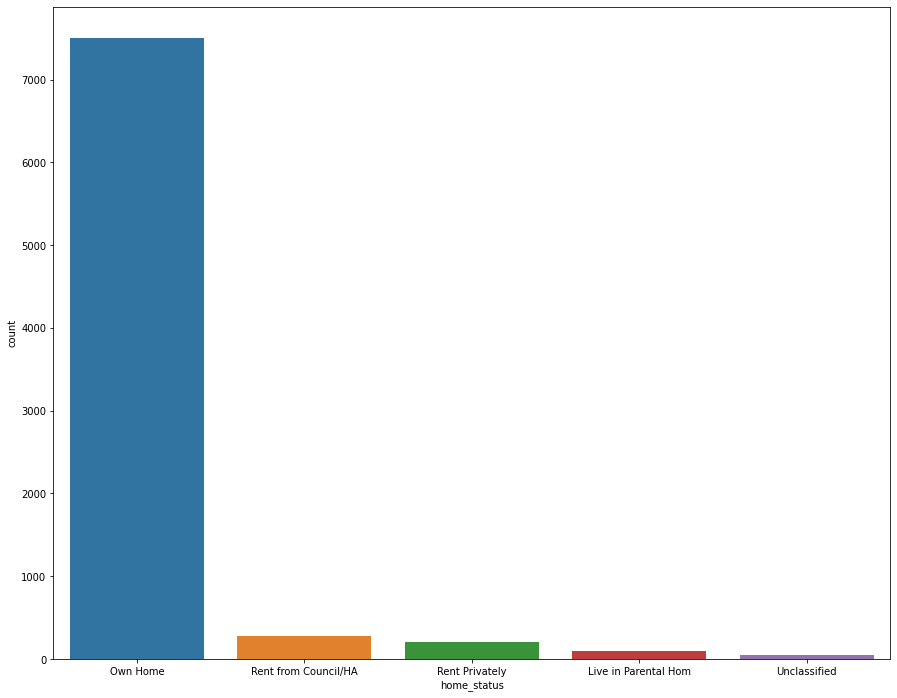

In [278]:
plt.figure(figsize=(15,12))
sns.countplot(x='home_status',data=cust_master_data,order=cust_master_data['home_status'].value_counts().index)

**Q: What is the breakdown of Customers across Family Income?**

In [279]:
cust_master_data['family_income'].value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64

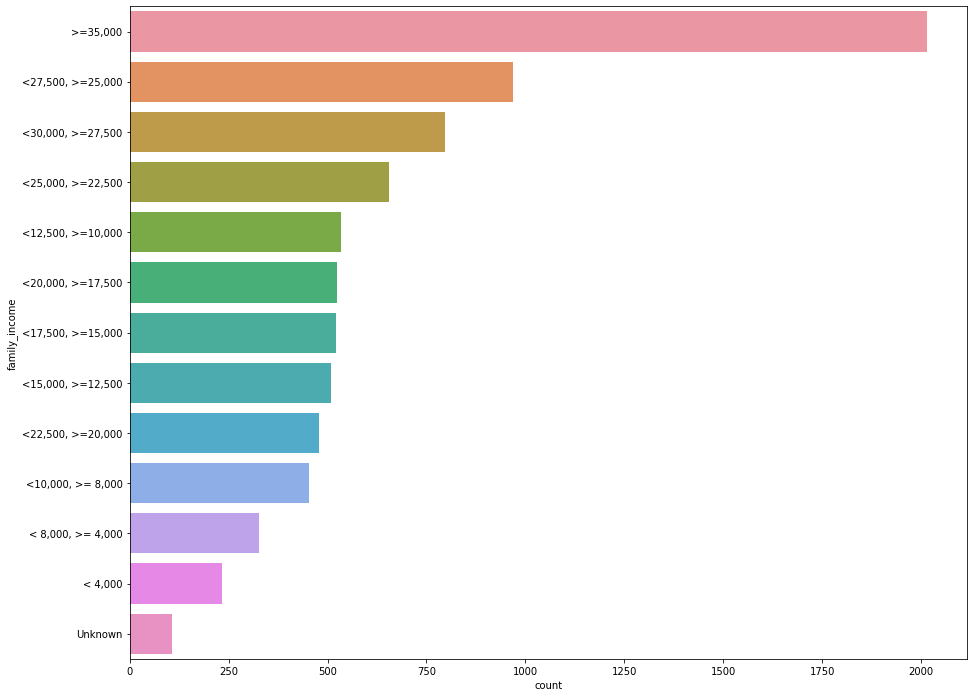

In [280]:
plt.figure(figsize=(15,12))
sns.countplot(y='family_income',data=cust_master_data,order=cust_master_data['family_income'].value_counts().index)

**Q: What is the breakdown of Customers across Self Employed?**

In [281]:
cust_master_data['self_employed'].value_counts()

No     7543
Yes     581
Name: self_employed, dtype: int64

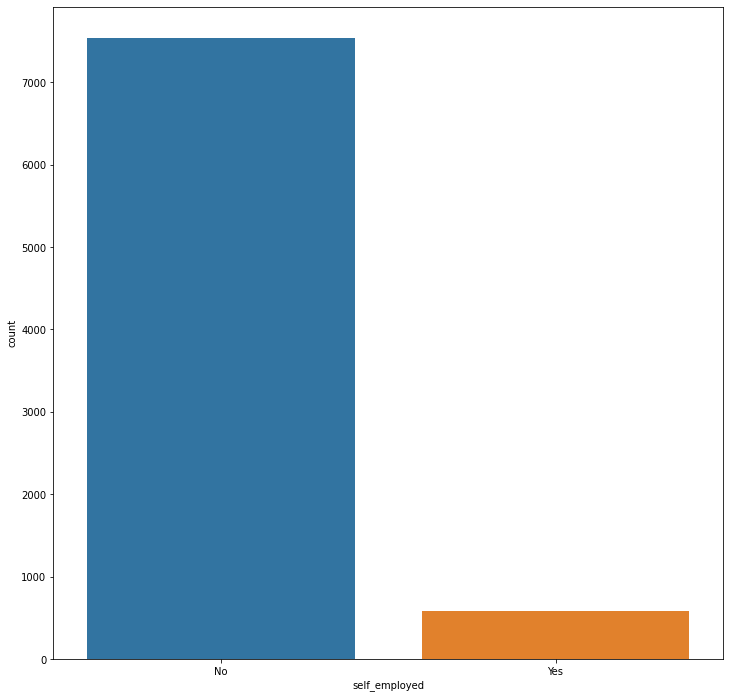

In [282]:
plt.figure(figsize=(12,12))
sns.countplot(x='self_employed',data=cust_master_data,order=cust_master_data['self_employed'].value_counts().index)

**Q: What is the breakdown of Customers across Self Employed Partner?**

In [283]:
cust_master_data['self_employed_partner'].value_counts()

No     7207
Yes     917
Name: self_employed_partner, dtype: int64

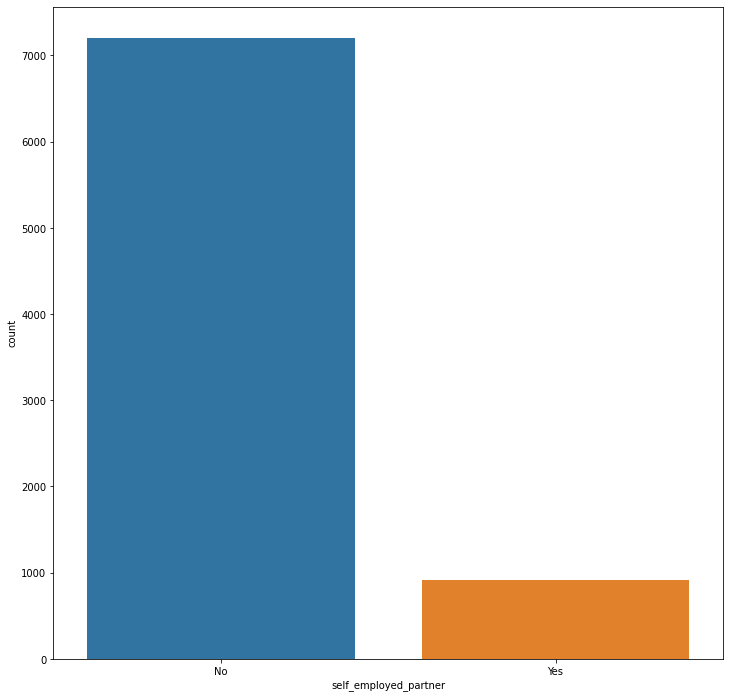

In [284]:
plt.figure(figsize=(12,12))
sns.countplot(x='self_employed_partner',data=cust_master_data,order=cust_master_data['self_employed_partner'].value_counts().index)

**Q: What is the breakdown of Customers across TV Area?**

In [285]:
cust_master_data['TVarea'].value_counts()

Central          1294
Carlton          1237
Meridian          977
Yorkshire         847
Granada           824
HTV               683
Anglia            597
Tyne Tees         433
Scottish TV       406
TV South West     286
Grampian          175
Unknown           154
Ulster            135
Border             76
Name: TVarea, dtype: int64

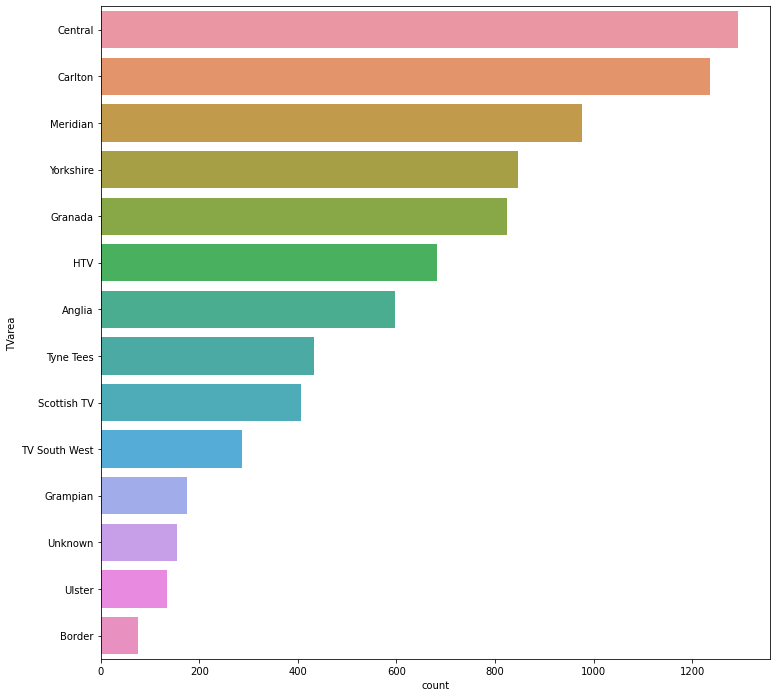

In [286]:
plt.figure(figsize=(12,12))
sns.countplot(y='TVarea',data=cust_master_data,order=cust_master_data['TVarea'].value_counts().index)

**Q: What is the breakdown of Customers across Region?**

In [287]:
cust_master_data['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

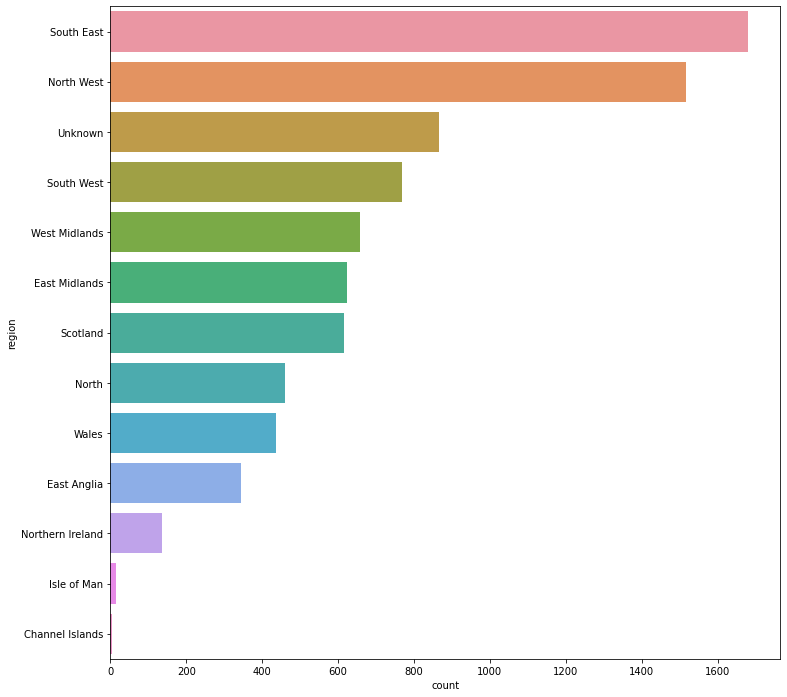

In [288]:
plt.figure(figsize=(12,12))
sns.countplot(y='region',data=cust_master_data,order=cust_master_data['region'].value_counts().index)

**Q: What is the breakdown of Customers across Gender?**

In [289]:
cust_master_data['gender'].value_counts()

Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64

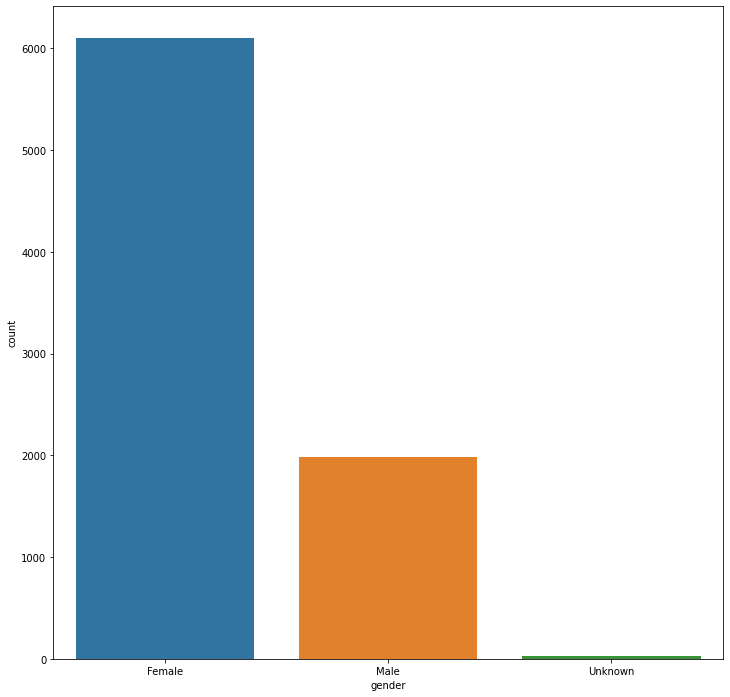

In [290]:
plt.figure(figsize=(12,12))
sns.countplot(x='gender',data=cust_master_data,order=cust_master_data['gender'].value_counts().index)

**Q: What is the breakdown of Customers across Revenue Grid?**

In [291]:
cust_master_data['Revenue_Grid'].value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

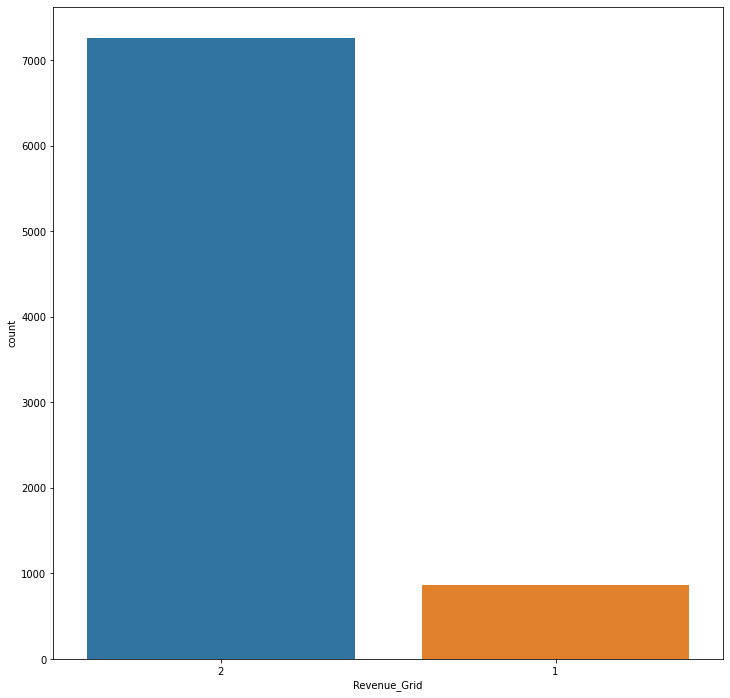

In [292]:
plt.figure(figsize=(12,12))
sns.countplot(x='Revenue_Grid',data=cust_master_data,order=cust_master_data['Revenue_Grid'].value_counts().index)

**Q: What is the percentage breakdown of Customers across Revenue Grid?**

Customers who are High Net Worth: 860
Customers who are Low Net Worth: 7264


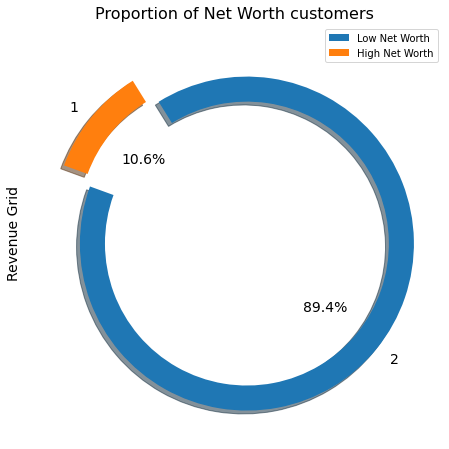

In [293]:
print('Customers who are High Net Worth:', cust_master_data['Revenue_Grid'].value_counts()[1])
print('Customers who are Low Net Worth:', cust_master_data['Revenue_Grid'].value_counts()[2])

space = np.ones(2)/10
cust_master_data['Revenue_Grid'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Low Net Worth', 'High Net Worth'])
plt.ylabel('Revenue Grid', size = 14)
plt.title('Proportion of Net Worth customers', size = 16)
plt.show()

**Below are various plots for Numeric feature distribution to get different view point for better data understanding**

**Below are various plots for Numeric feature with Revenue_Grid feature to get different view point for better data understanding**

<Figure size 3600x1800 with 0 Axes>

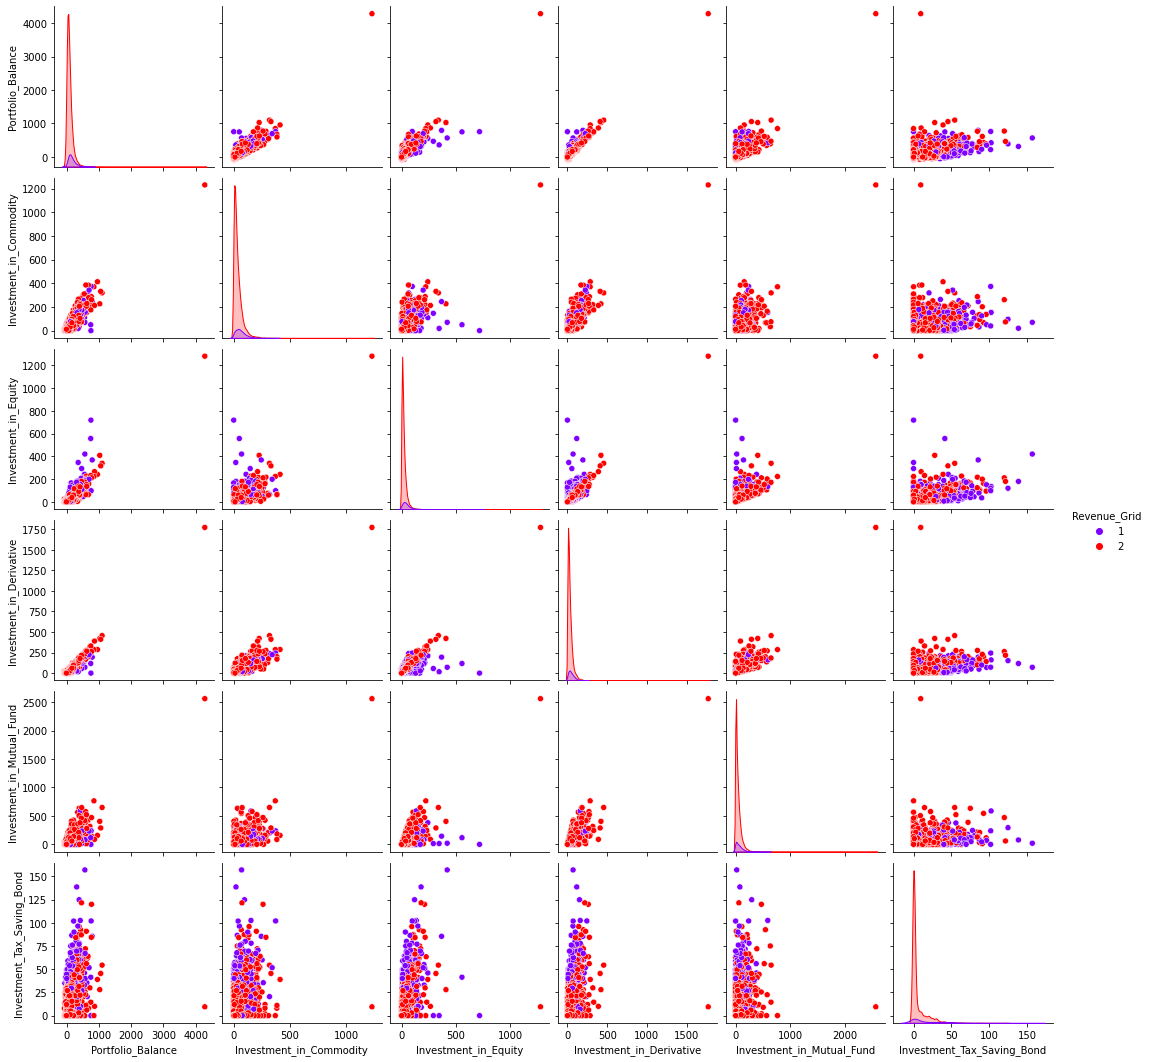

In [294]:
plt.figure(figsize=(50,25))
sns.pairplot(cust_master_data[['Portfolio_Balance','Investment_in_Commodity','Investment_in_Equity','Investment_in_Derivative','Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond','Revenue_Grid']],palette='rainbow',diag_kind='kde',hue="Revenue_Grid")

<Figure size 3600x1800 with 0 Axes>

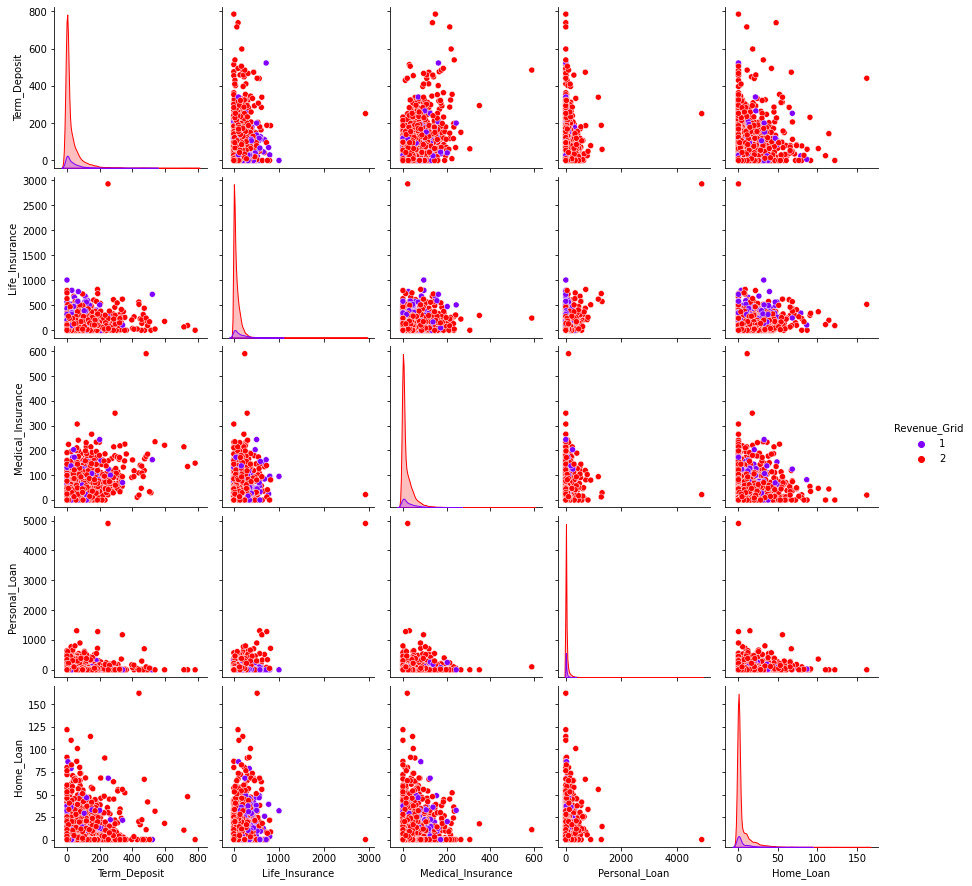

In [295]:
plt.figure(figsize=(50,25))
sns.pairplot(cust_master_data[['Term_Deposit','Life_Insurance','Medical_Insurance','Personal_Loan','Home_Loan','Revenue_Grid']],palette='rainbow',diag_kind='kde',hue="Revenue_Grid")

<Figure size 3600x1800 with 0 Axes>

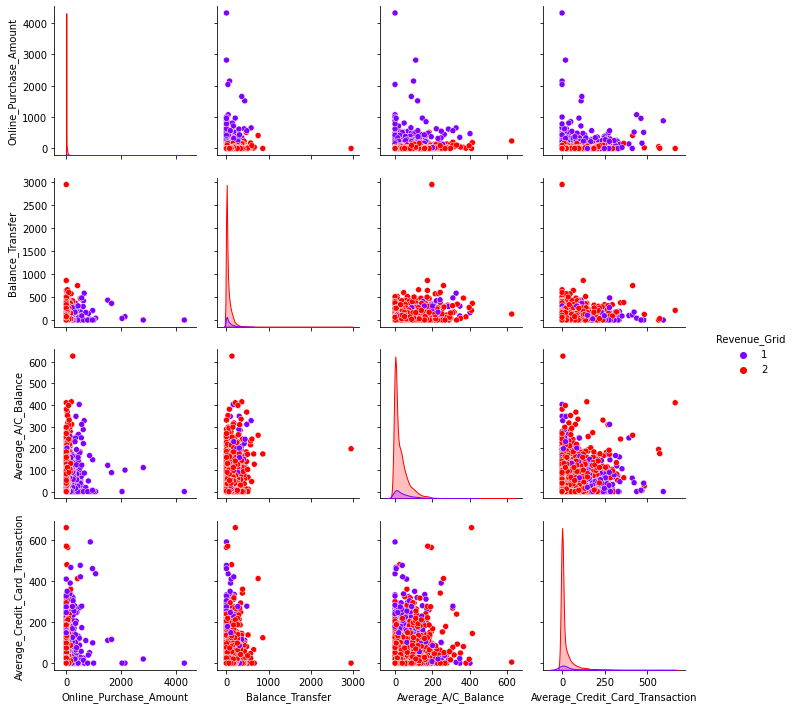

In [296]:
plt.figure(figsize=(50,25))
sns.pairplot(cust_master_data[['Online_Purchase_Amount','Balance_Transfer','Average_A/C_Balance','Average_Credit_Card_Transaction','Revenue_Grid']],palette='rainbow',diag_kind='kde',hue="Revenue_Grid")

**Q: What is breakdown of Customers across Revenue Grid for various Numerical features**

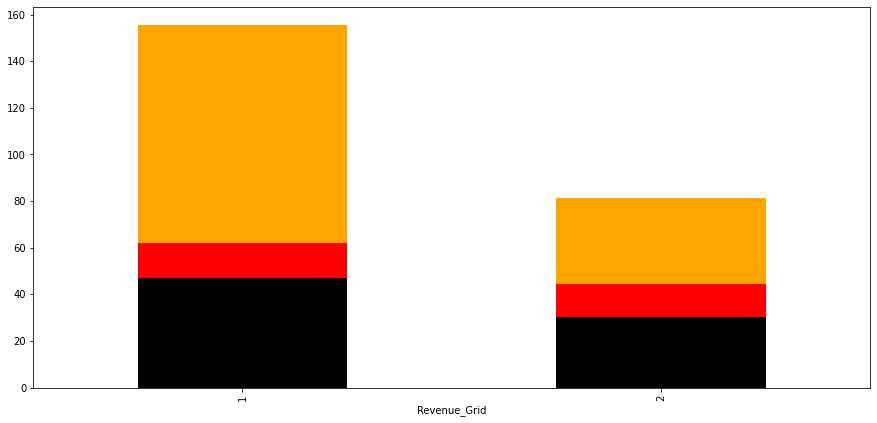

In [297]:
cust_master_data.groupby(['Revenue_Grid'])['Portfolio_Balance'].mean().plot(kind='bar', figsize=(15, 7), color='orange')
cust_master_data.groupby(['Revenue_Grid'])['Balance_Transfer'].mean().plot(kind='bar', figsize=(15, 7), color='red')
cust_master_data.groupby(['Revenue_Grid'])['Average_A/C_Balance'].mean().plot(kind='bar', figsize=(15, 7), color='black')

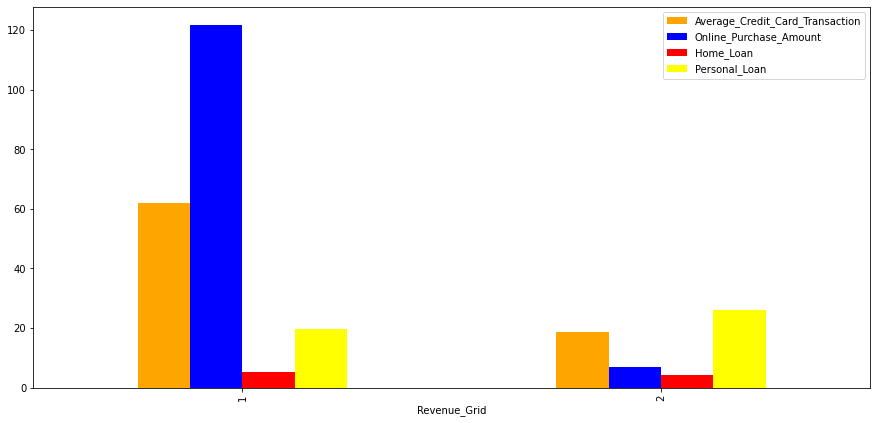

In [298]:
cust_master_data.groupby(['Revenue_Grid'])[['Average_Credit_Card_Transaction','Online_Purchase_Amount','Home_Loan', 'Personal_Loan']].mean().plot(kind='bar', figsize=(15, 7), color=['orange','blue','red','yellow'])

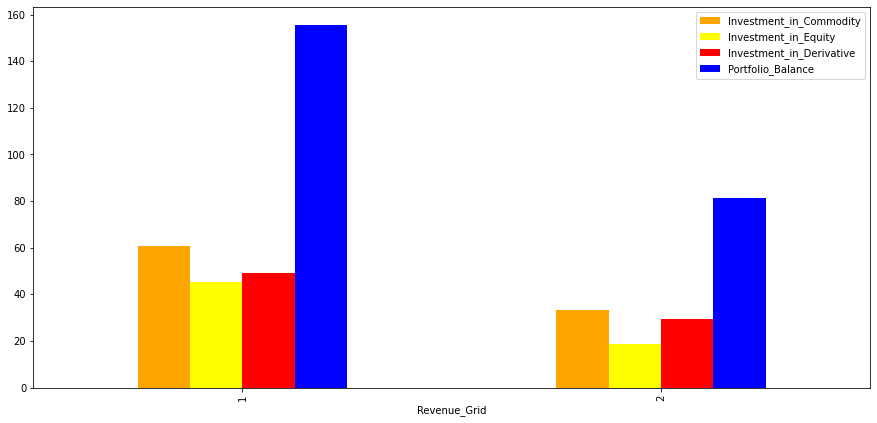

In [299]:
cust_master_data.groupby(['Revenue_Grid'])[['Investment_in_Commodity','Investment_in_Equity','Investment_in_Derivative', 'Portfolio_Balance']].mean().plot(kind='bar', figsize=(15, 7), color=['orange','yellow','red','blue'])

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

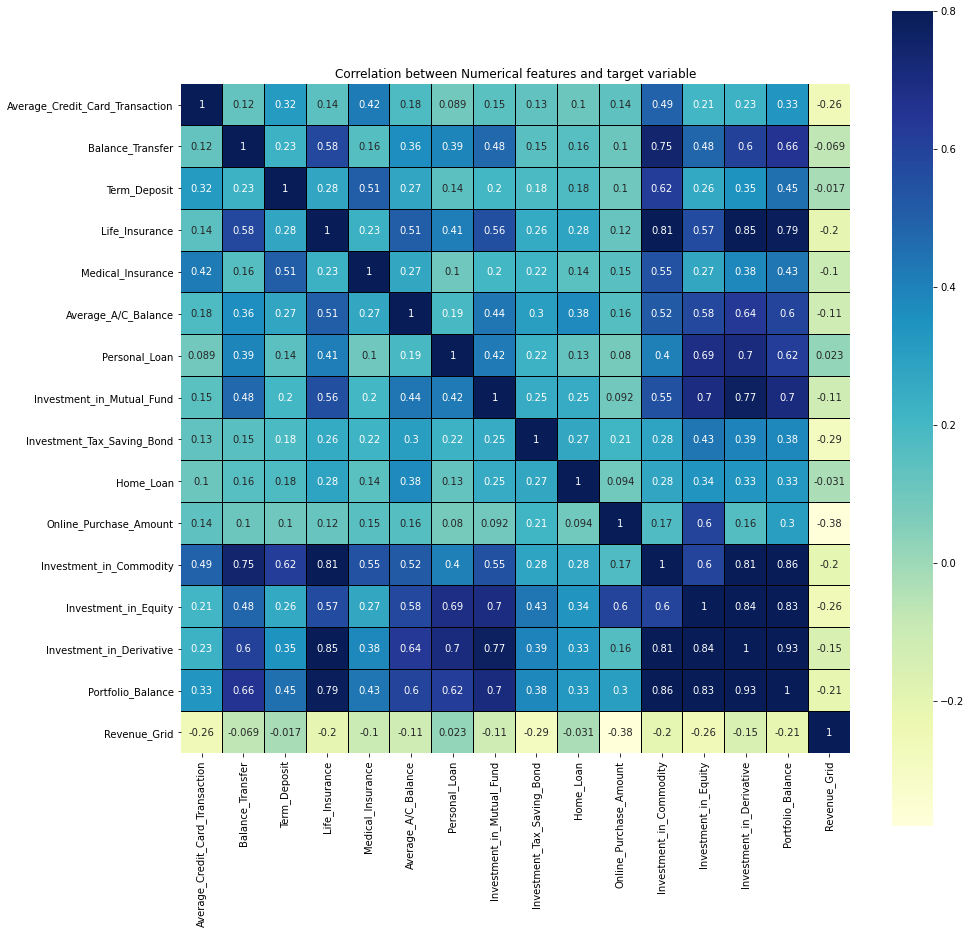

In [300]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = cust_master_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- Only **Personal_Loan** has positive correlation with **Revenue_Grid**
- There is higher positive correlation for **Personal_Loan** with **Portfolio_Balance** and **Investment_in_Equity**
- There is strong positive correlation for **Portfolio_Balance** with **Investment_in_Derivative**, **Investment_in_Commodity**,**Investment_in_Equity** and **Life_Insurance**
- There is strong positive correlation for **Life_Insurance** with **Investment_in_Derivative** and **Investment_in_Commodity**
- There is higher positive correlation for **Balance_Transfer** with **Portfolio_Balance**, **Investment_in_Commodity** and **Investment_in_Derivative**
- There is higher positive correlation for **Term_Deposit** with **Investment_in_Commodity**

In [301]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
cust_master_data.cov()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
Average_Credit_Card_Transaction,2616.066366,496.569883,879.403539,698.484781,682.616205,412.310630,389.079329,485.765863,85.330925,52.608194,639.820699,1074.628385,344.152845,458.927642,1853.816510,-4.100389
Balance_Transfer,496.569883,6254.388576,965.111469,4386.991359,410.524084,1304.304017,2628.810512,2425.206173,152.827101,122.169779,753.954829,2502.713225,1231.217597,1884.779734,5614.648909,-1.670343
Term_Deposit,879.403539,965.111469,2930.439791,1440.116194,882.446473,672.520276,652.152823,700.346332,124.581106,96.450433,511.578056,1419.500752,459.608519,745.358823,2649.698435,-0.290006
Life_Insurance,698.484781,4386.991359,1440.116194,9170.447054,710.921666,2200.729815,3352.098608,3441.641101,312.810539,267.955522,1042.066598,3281.388190,1769.557797,3198.109456,8222.823993,-5.951646
Medical_Insurance,682.616205,410.524084,882.446473,710.921666,1025.429738,386.633071,277.309961,417.256791,87.337456,46.150204,441.556068,742.387871,276.042355,484.147454,1503.726392,-1.007096
Average_A/C_Balance,412.310630,1304.304017,672.520276,2200.729815,386.633071,2047.511784,745.255882,1275.924609,173.504748,169.915142,669.818708,995.299120,846.992586,1138.260182,2939.695507,-1.590718
Personal_Loan,389.079329,2628.810512,652.152823,3352.098608,277.309961,745.255882,7247.142423,2326.727849,241.685960,106.139824,627.479592,1459.889506,1882.408869,2365.038261,5700.282267,0.598251
Investment_in_Mutual_Fund,485.765863,2425.206173,700.346332,3441.641101,417.256791,1275.924609,2326.727849,4149.424055,206.864468,163.020154,547.021513,1494.040003,1444.835012,1969.640436,4914.106457,-2.180526
Investment_Tax_Saving_Bond,85.330925,152.827101,124.581106,312.810539,87.337456,173.504748,241.685960,206.864468,160.614404,33.488979,246.304850,152.576717,177.077757,197.136327,527.232131,-1.112766
Home_Loan,52.608194,122.169779,96.450433,267.955522,46.150204,169.915142,106.139824,163.020154,33.488979,98.917876,85.966051,117.066935,109.575014,131.111851,353.048863,-0.094789


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [302]:
# getting y
y= cust_master_data.Revenue_Grid

In [303]:
cust_master_data.loc[cust_master_data['region']=='Channel Islands']

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5102,Zero,26-30,Single/Never Married,Business Manager,Unknown,Own Home,">=35,000",No,No,Unknown,0.00,129.43,14.48,154.89,9.99,23.43,0.00,115.90,0.0,0.00,0.0,Female,Channel Islands,61.76,23.22,50.70,138.87,2
1591,2,41-45,Divorced/Separated,Other,Unknown,Own Home,"<10,000, >= 8,000",Yes,No,Unknown,19.99,0.00,29.99,0.00,11.96,0.00,38.47,0.00,0.0,0.00,0.0,Female,Channel Islands,12.39,6.41,8.41,23.74,2
6492,Zero,51-55,Divorced/Separated,Secretarial/Admin,Unknown,Own Home,"<15,000, >=12,500",No,No,Unknown,0.00,0.00,0.00,0.00,0.00,43.46,0.00,59.46,0.0,0.00,0.0,Female,Channel Islands,0.00,17.15,17.15,50.13,2
4995,Zero,26-30,Single/Never Married,Unknown,Unknown,Live in Parental Hom,Unknown,Yes,No,Unknown,0.00,0.00,0.00,0.00,0.00,11.49,0.00,89.43,0.0,0.00,0.0,Female,Channel Islands,0.00,16.82,16.82,54.61,2
6834,Zero,31-35,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,Unknown,6.56,290.28,64.46,63.42,66.43,55.45,0.00,39.37,2.0,17.44,383.4,Female,Channel Islands,98.23,82.94,37.78,251.12,1


In [304]:
cust_master_data.drop(labels=[5102,1591,6492,4995,6834], axis=0, inplace=True)

In [305]:
finalX_encoded = pd.get_dummies(cust_master_data, columns=['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region'], drop_first=True)
finalX = finalX_encoded.drop(columns=['Revenue_Grid'],axis=1)
y= cust_master_data.Revenue_Grid
finalX.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,children_2,children_3,children_4+,children_Zero,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_Yes,self_employed_partner_Yes,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5466,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9091,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9744,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10700,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [306]:
finalX.shape

(8119, 95)

In [307]:
test_finalX= pd.get_dummies(cust_test_data, columns=['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region'], drop_first=True)
test_finalX.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,children_2,children_3,children_4+,children_Zero,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_Yes,self_employed_partner_Yes,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
697,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7897,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4729,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6914,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,21.59,24.57,29.23,86.32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2795,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,53.66,16.22,32.89,102.99,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [308]:
test_finalX.shape

(2031, 95)

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [309]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (6089, 95)
y_train shape:  (6089,)
X_test shape:  (2030, 95)
y_test shape:  (2030,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6089 entries, 1518 to 11518
Data columns (total 95 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Average_Credit_Card_Transaction       6089 non-null   float64
 1   Balance_Transfer                      6089 non-null   float64
 2   Term_Deposit                          6089 non-null   float64
 3   Life_Insurance                        6089 non-null   float64
 4   Medical_Insurance                     6089 non-null   float64
 5   Average_A/C_Balance                   6089 non-null   float64
 6   Personal_Loan                         6089 non-null   float64
 7   Investment_in_Mutual_Fund             6089 non-null   float64
 8   Investment_Tax_Saving_Bond            6089 non-null   float64
 9   Home_Loan                             6089 non-

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commodity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,children_2,children_3,children_4+,children_Zero,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_Yes,self_employed_partner_Yes,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1518,49.98,29.99,25.00,133.91,14.98,44.47,0.00,15.46,0.00,0.0,39.49,50.77,16.57,34.80,42.79,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8645,0.00,64.98,132.95,79.94,70.46,79.97,0.00,76.95,4.99,0.0,34.95,69.67,32.81,52.05,153.39,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9964,0.00,0.00,0.00,0.01,0.00,0.00,0.00,21.99,0.00,0.0,0.00,0.00,3.67,3.67,57.58,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7928,51.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,59.45,10.39,9.91,0.00,71.28,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2025,436.80,39.99,35.48,86.97,172.85,0.00,6.99,17.99,0.00,0.0,1071.22,154.42,182.70,47.47,341.90,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


<a name = Section73></a>
### **7.3 Data Scaling**

- Trying to evaluate model without any scaling of data.

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

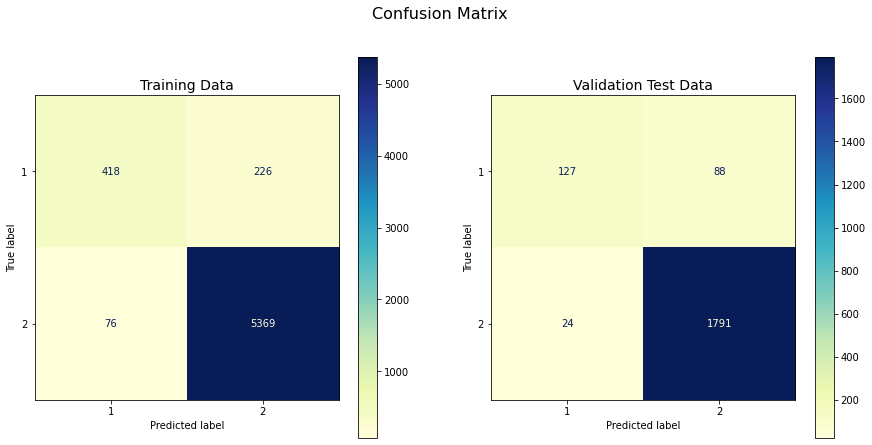

In [310]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

**Observation:**
- **Train Data:**
  - Model predicted **405 instances correctly** for **High Net Worth class (1)** while **5731 instances** were predicted **correctly** for **Low Net Worth class (2)**.
  - Model **identified 240 instances as Low Net Worth but in actual** they **were High Net Worth**.
  - Model **identified 77 instances as High Net Worth but in actual** they **were Low Net Worth**.

- **Test Data:**
  - Model predicted **125 instances correctly** for **High Net Worth class (1)** while **1794 instances** were predicted **correctly** for **Low Net Worth class(2)**.
  - Model **identified 90 instance as Low Net Worth but in actual** they **were High Net Worth**.
  - Model **identified 22 instances as High Net Worth but in actual** they **were Low Net Worth**.

In [311]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.9448275862068966


In [312]:
print('Precision score for test validation data is :', precision_score(y_test,y_test_pred_count))

Precision score for test validation data is : 0.8410596026490066


In [313]:
print('Recall score for test validation data is :', recall_score(y_test,y_test_pred_count))

Recall score for test validation data is : 0.5906976744186047


In [314]:
print('F1 score for test validation data is :', f1_score(y_test,y_test_pred_count))

F1 score for test validation data is : 0.6939890710382514


In [315]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

           1       0.85      0.65      0.73       644
           2       0.96      0.99      0.97      5445

    accuracy                           0.95      6089
   macro avg       0.90      0.82      0.85      6089
weighted avg       0.95      0.95      0.95      6089

                    Test Validation Data Report           
              precision    recall  f1-score   support

           1       0.84      0.59      0.69       215
           2       0.95      0.99      0.97      1815

    accuracy                           0.94      2030
   macro avg       0.90      0.79      0.83      2030
weighted avg       0.94      0.94      0.94      2030



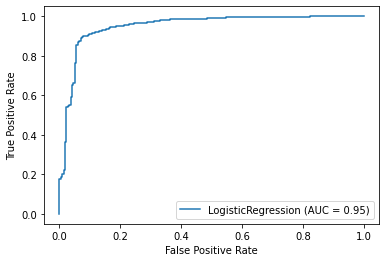

In [316]:
 roc_disp= plot_roc_curve(logreg, X_test, y_test)

In [317]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred = logreg.predict(test_finalX)
y_test_pred
#print (y_test_pred.shape)
#print (y_test_pred)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,

In [318]:
output = pd.DataFrame({'REF_NO': cust_test_data.index,'Revenue_Grid': y_test_pred})
output.to_csv('customer-classification-submission.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Logistic Regression model was used for model evaluation and prediction considering this is ML Foundation project.
- F1-Score was used to arrive at model evaluation which indicates good score for Test Validation data used.
- Rows related to "Channel Islands" class in **region** column was dropped as it does not exist in Test Dataset.
- Correlation Heatmap shows linear relationship between Numeric features and Target Variable.